Best Line Found! Error: 0
Weights: [-0.676922    0.61167629]


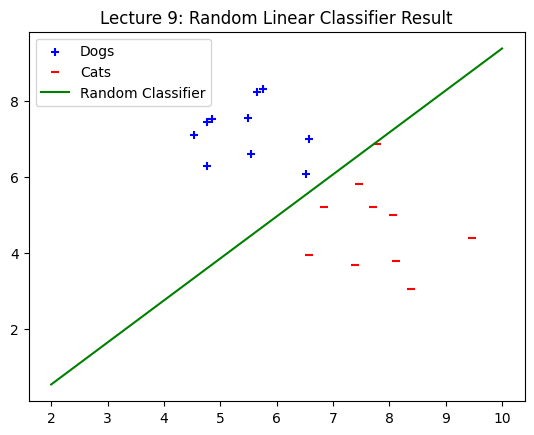

In [ ]:
import numpy as np                  # Library for math and arrays (Matrices)
import matplotlib.pyplot as plt     # Library for plotting graphs

# --- STEP 1: GATHER DATA (Lecture 6/9) ---
# We need to ensure our "Random" numbers are the same every time we run this.
# This makes the code reproducible.
np.random.seed(42)  

# Generate 10 Dogs (Class 0 or +1)
# We use a "Normal Distribution" (Bell Curve) because real data clusters around a mean.
# Dogs: Mean Whisker Length = 5, Mean Ear Flappiness = 8
dogs_y = np.random.normal(8, 1, 10) 

# Generate 10 Cats (Class 1 or -1)
dogs_x = np.random.normal(5, 1, 10) 
# Cats: Mean Whisker Length = 8, Mean Ear Flappiness = 5
cats_x = np.random.normal(8, 1, 10)
cats_y = np.random.normal(5, 1, 10)

# Organize Data for the Computer
# We stack the x and y coordinates together. 
# np.vstack puts columns together vertically.
dogs_data = np.vstack((dogs_x, dogs_y)).T
cats_data = np.vstack((cats_x, cats_y)).T

# Define Labels (The "Answers")
# Dogs = +1, Cats = -1
dog_labels = np.ones(10) 
cat_labels = np.full(10, -1)

# Combine everything into one dataset X (Features) and Y (Labels)
X = np.vstack((dogs_data, cats_data))
Y = np.concatenate((dog_labels, cat_labels))

# --- STEP 2 & 3: THE ALGORITHM (Lecture 7) ---

def random_linear_classifier(X, Y, k, d):
    """
    X: Input features (Whisker, Ears)
    Y: True Labels (+1 or -1)
    k: Hyperparameter (How many random guesses?)
    d: Number of features (2)
    """
    best_error = float('inf') # Start with infinite error (worst possible score)
    best_theta = None         # To store the best line slope found
    best_theta0 = None        # To store the best line offset found

    # THE LOOP: Try 'k' random lines
    for i in range(k):
        
        # 1. GENERATE HYPOTHESIS
        # Randomly guess the angle of the line (Theta) and position (Theta0)
        # We use random.normal to pick numbers from a standard distribution
        theta = np.random.normal(0, 1, d) 
        theta0 = np.random.normal(0, 1)   

        current_error = 0 # Reset error counter for this specific line

        # 2. COMPUTE TRAINING ERROR (Check every point)
        for j in range(len(X)):
            features = X[j]
            true_label = Y[j]
            
            # THE MATH: Calculate the score
            # Equation: theta1*x1 + theta2*x2 + theta0
            # np.dot multiplies the arrays and adds them up
            prediction_score = np.dot(theta, features) + theta0
            
            # THE DECISION (Sign Function)
            # If score > 0, we predict Dog (+1). If < 0, we predict Cat (-1).
            if prediction_score > 0:
                prediction = 1
            else:
                prediction = -1
            
            # THE CHECK: Did we make a mistake?
            if prediction != true_label:
                current_error += 1 
        
        # 3. OPTIMIZATION (Keep the Best)
        # If this random line made fewer mistakes than our previous record holder...
        if current_error < best_error:
            best_error = current_error # Update the record
            best_theta = theta         # Save this specific line
            best_theta0 = theta0       # Save this specific offset

    return best_theta, best_theta0, best_error

# --- STEP 4: RUN THE ALGORITHM (Lecture 9) ---
# k=100 is a Hyperparameter. We (humans) chose to try 100 times.
theta_opt, theta0_opt, min_err = random_linear_classifier(X, Y, k=100, d=2)

print(f"Best Line Found! Error: {min_err}")
print(f"Weights: {theta_opt}")

# --- VISUALIZATION (Plotting) ---
# Plot the dots
plt.scatter(dogs_x, dogs_y, color='blue', marker='+', label='Dogs')
plt.scatter(cats_x, cats_y, color='red', marker='_', label='Cats')

# Plot the Line
# Math to plot a 2D line: y = -(theta1*x + theta0) / theta2
x_vals = np.linspace(2, 10, 100)
y_vals = -(theta_opt[0] * x_vals + theta0_opt) / theta_opt[1]

plt.plot(x_vals, y_vals, color='green', label='Random Classifier')
plt.legend()
plt.title("Lecture 9: Random Linear Classifier Result")
plt.show()